# KIỂM TRA GIỮA KỲ

## MÔN: PHÂN TÍCH THỐNG KÊ NHIỀU CHIỀU

### Họ tên: Nguyễn Tiến Đạt
### MSV: 20000542

### Câu 1.

Cho bộ dữ liệu nghiên cứu về sự biến động của tiền thuê đất nông nghiệp để trồng cỏ linh lăng - thức ăn cho bò sữa vào năm 1977 tại 67 hạt của Minnesota. Mô tả biến:

* Rent - Giá thuê trung bình của đất dùng để trồng cỏ linh lăng (USD/mẫu)
* AllRent - Giá thuê trung bình của đất canh tác (USD/mẫu)
* Cows - Mật độ bò (con/dặm vuông)
* Pasture - Tỷ lệ đất nông nghiệp được sử dụng làm đồng cỏ

Gọi $X = (Rent, AllRent, Cows, Pasture)^T$ là vectơ ngẫu nhiên 4−chiều.

(i) Nhập dữ liệu vào R/RStudio.

In [1]:
data = read.csv('ThueDatTrongCo.csv')
head(data)

,Rent,AllRent,Cows,Pasture
,<dbl>,<dbl>,<dbl>,<dbl>
1,18.38,15.50,17.25,0.24
2,20.00,22.29,18.51,0.20
3,11.50,12.36,11.13,0.12
4,25.00,31.84,5.54,0.12
5,52.50,83.90,5.44,0.04
6,82.50,72.25,20.37,0.05


(ii) Tìm trung bình mẫu, ma trận hiệp phương sai mẫu và ma trận tương quan mẫu.

In [2]:
colMeans(data)

Rent    AllRent       Cows    Pasture 
42.1661194 43.6398507 20.5632836  0.1697015

In [3]:
cov(data)

,Rent,AllRent,Cows,Pasture
Rent,510.154060,418.372136,106.886387,-1.0553906
AllRent,418.372136,447.344177,15.802796,-1.5275258
Cows,106.886387,15.802796,235.197416,1.1580722
Pasture,-1.055391,-1.527526,1.158072,0.0208787


In [4]:
cor(data)

,Rent,AllRent,Cows,Pasture
Rent,1.0000000,0.87577226,0.30857124,-0.3233783
AllRent,0.8757723,1.00000000,0.04871882,-0.4998227
Cows,0.3085712,0.04871882,1.00000000,0.5225979
Pasture,-0.3233783,-0.49982268,0.52259791,1.0000000


(iii) Tìm giá trị riêng, vectơ riêng của ma trận hiệp phương sai mẫu.

In [5]:
eigen = eigen(cov(data))
eigen$values

[1] 9.101420e+02 2.433629e+02 3.920241e+01 9.274382e-03

In [6]:
eigen$vectors

0.733105729,-0.118574101,0.6696974204,0.001240119
0.667235780,0.316077012,-0.6744521565,0.002454512
0.131716192,-0.941275788,-0.3108356237,-0.005652451
-0.001802393,-0.005949401,-0.0009320555,0.999980243


(iv) X có phân bố chuẩn 4−chiều không?

In [7]:
sapply(data, shapiro.test)

Rent                        AllRent                    
statistic 0.9540613                   0.9551989                  
p.value   0.01471229                  0.01686195                 
method    Shapiro-Wilk normality test Shapiro-Wilk normality test
data.name X[[i]]                      X[[i]]                     
          Cows                        Pasture                    
statistic 0.9080142                   0.8182695                  
p.value   0.0001148565                1.22909e-07                
method    Shapiro-Wilk normality test Shapiro-Wilk normality test
data.name X[[i]]                      X[[i]]

H0: Từng biến đều tuân theo phân phối chuẩn 1-chiều  
H1: Các biến không tuân theo phân phối chuẩn 1-chiều  
Do p-value của các biến đều < 0.05 $\Rightarrow$ Bác bỏ H0  
Có cơ sở để nói các biến đều không tuân theo phân phối chuẩn 1-chiều  
X không tuân theo phân phối chuẩn 4-chiều

(v) Vẽ biểu đồ thể hiện rõ vị trí tọa độ các điểm và các đường đồng mức tương ứng của
vecto ngẫu nhiên 2−chiều gồm hai biến Rent và Cows.

In [18]:
# install.packages("KernSmooth")
library(KernSmooth)

In [9]:
data1 <- data[c('Rent', 'Cows')]
head(data1)

,Rent,Cows
,<dbl>,<dbl>
1,18.38,17.25
2,20.00,18.51
3,11.50,11.13
4,25.00,5.54
5,52.50,5.44
6,82.50,20.37


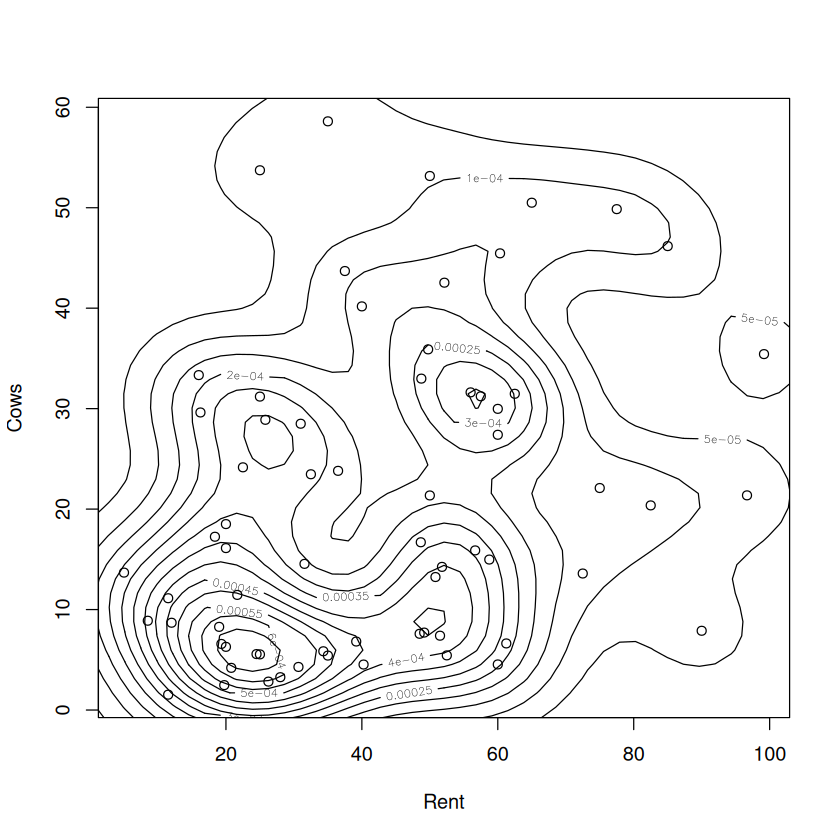

In [10]:
datad <- bkde2D(data1, bandwidth = c(dpik(data1$Rent), dpik(data1$Cows)))
plot(data1)
contour(x = datad$x1, y = datad$x2, z = datad$fhat, add = TRUE)

(vi) Giải thuật từng bước step forward để tìm mô hình biểu diễn Rent theo các biến còn
lại "phù hợp nhất". Viết phương trình hồi quy tuyến tính.

In [11]:
only = lm(Rent ~ 1, data = data)
all = lm(Rent ~ ., data = data)

In [12]:
forward = step(only, formula(all), direction = "forward", trace = 0)
forward$coefficients

(Intercept)     AllRent        Cows 
 -6.1143282   0.9213684   0.3925476

Phương trình hồi quy: $Rent = -6.11 43 + AllRent \times 0.9214 + Cows \times 0.3925 + \epsilon$

(vii) Tìm khoảng tin cậy 90% của các hệ số trong mô hình hồi quy trên.

(viii) Kiểm định xem các hệ số trong mô hình hồi quy trên có khác 0 không?

In [13]:
summary(forward)


Call:
lm(formula = Rent ~ AllRent + Cows, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4827  -5.8720   0.3321   4.3855  28.6007 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.11433    2.96123  -2.065    0.043 *  
AllRent      0.92137    0.05382  17.121  < 2e-16 ***
Cows         0.39255    0.07422   5.289 1.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.236 on 64 degrees of freedom
Multiple R-squared:  0.8379,	Adjusted R-squared:  0.8328 
F-statistic: 165.3 on 2 and 64 DF,  p-value: < 2.2e-16


H0: Hệ số bằng 0  
H1: Hệ số khác 0  
Do các hệ số đều có p-value < 0,05 $\Rightarrow$ Bác bỏ H0  
Có cơ sở để nói các hệ số trong mô hình "forward" là khác 0

### Câu 2.

Cho vectơ ngẫu nhiên $W = (X, Y)^T$ có vectơ kỳ vọng $\mu = (160, 170)^T$ và ma trận hiệp phương sai
$$
\left(\begin{array}{cc} 
16.5 & 0 \\
0 & 25
\end{array}\right)
.$$

Sinh ngẫu nhiên 1000 giá trị của $W$ theo phân phối chuẩn 2−chiều. Kiểm định xem từng biến ngẫu nhiên trong đó có tuân theo phân phối chuẩn
1−chiều không?

In [20]:
# install.packages("MASS")
library(MASS)

In [24]:
S <- matrix(c(16.5, 0, 0, 25), nrow = 2)
cm <- c(160, 170)
X <- mvrnorm(1000, cm, S)

In [25]:
shapiro.test(X[, 1])


	Shapiro-Wilk normality test

data:  X[, 1]
W = 0.99892, p-value = 0.8275


H0: Biến ngẫu nhiên tuân theo phân phối chuẩn 1-chiều  
H1: Biến ngẫu nhiên không tuân theo phân phối chuẩn 1-chiều  
Do p-value = 0.8275 > 0.05 $\Rightarrow$ Chấp nhận H0  
Có cơ sở để nói biến ngẫu nhiên tuân theo phân phối chuẩn 1-chiều

In [26]:
shapiro.test(X[, 2])


	Shapiro-Wilk normality test

data:  X[, 2]
W = 0.99815, p-value = 0.3494


H0: Biến ngẫu nhiên tuân theo phân phối chuẩn 1-chiều  
H1: Biến ngẫu nhiên không tuân theo phân phối chuẩn 1-chiều  
Do p-value = 0.3494 > 0.05 $\Rightarrow$ Chấp nhận H0  
Có cơ sở để nói biến ngẫu nhiên tuân theo phân phối chuẩn 1-chiều